In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import os

#### merge 12 months of data in single file

In [190]:
df=pd.read_csv('./Sales_Data/Sales_April_2019.csv')
files=[file for file in os.listdir('./Sales_Data')]
all_data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_data=pd.concat([all_data,df])
all_data.to_csv('all_data.csv',index=False)
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Clean data 🧹

In [191]:
nan_df=all_data[all_data.isna().any(axis=1)] # null value should not exist
all_data=all_data.dropna(how='any')
all_data=all_data[all_data['Order Date'].str[0:2]!='Or'] # remove 'Or' in Order Date
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each']= pd.to_numeric(all_data['Price Each']) # make float
all_dat

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### Q-1what was the best month for sales?how much was earned that month?


<Axes: xlabel='Month'>

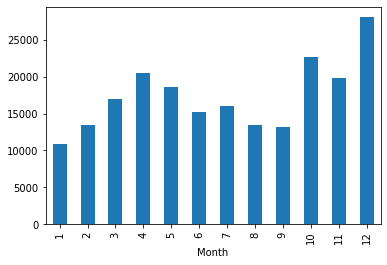

In [126]:
# some additional columns
#1) add month column
all_data['Month']=all_data['Order Date'].str[0:2]
all_data['Month']=all_data['Month'].astype('int32')
all_data.groupby('Month')['Quantity Ordered'].sum().plot(kind='bar')


In [127]:
all_data['total sales']=all_data['Quantity Ordered'] * all_data['Price Each']
all_data.groupby('Month')['total sales'].sum()


Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: total sales, dtype: float64

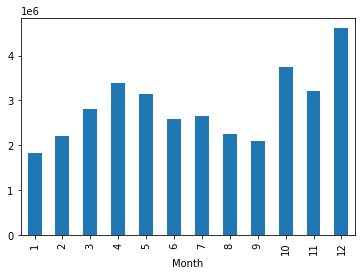

In [128]:
max_sales=all_data.groupby('Month')['total sales'].sum().plot(kind='bar')

Text(0, 0.5, 'Sales in USD')

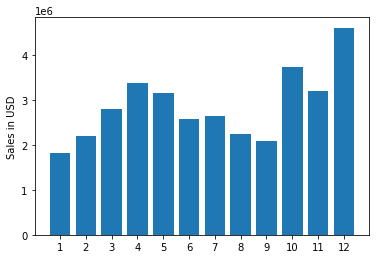

In [129]:
result=all_data.groupby('Month').sum()
months=range(1,13)
plt.bar(months,result['total sales'])
plt.xticks(months)
plt.ylabel('Sales in USD')

### December has most number of sales

### Q-2 which city had the highest number of sales?

In [130]:
all_data['city']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])
all_data.head() 


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [131]:
all_data.groupby('city').describe()

Quantity Ordered                                               \
                          count      mean       std  min  25%  50%  75%  max   
city                                                                           
 Atlanta                14881.0  1.115651  0.422960  1.0  1.0  1.0  1.0  7.0   
 Austin                  9905.0  1.125997  0.439235  1.0  1.0  1.0  1.0  7.0   
 Boston                 19934.0  1.130129  0.455761  1.0  1.0  1.0  1.0  8.0   
 Dallas                 14820.0  1.128880  0.455736  1.0  1.0  1.0  1.0  8.0   
 Los Angeles            29605.0  1.124438  0.442993  1.0  1.0  1.0  1.0  9.0   
 New York City          24876.0  1.122849  0.436642  1.0  1.0  1.0  1.0  7.0   
 Portland               12465.0  1.127397  0.448369  1.0  1.0  1.0  1.0  8.0   
 San Francisco          44732.0  1.123111  0.443520  1.0  1.0  1.0  1.0  9.0   
 Seattle                14732.0  1.123608  0.436592  1.0  1.0  1.0  1.0  7.0   

               Price Each              ... Month       total sales  \
                    count        mean  ...   75%   max       count   
city                                   ...                           
 Atlanta          14881.0  186.809233  ...  10.0  12.0     14881.0   
 Austin            9905.0  182.723232  ...  10.0  12.0      9905.0   
 Boston           19934.0  182.472648  ...  10.0  12.0     19934.0   
 Dallas           14820.0  185.737370  ...  10.0  12.0     14820.0   
 Los Angeles      29605.0  183.125662  ...  10.0  12.0     29605.0   
 New York City    24876.0  186.339075  ...  10.0  12.0     24876.0   
 Portland         12465.0  185.138185  ...  10.0  12.0     12465.0   
 San Francisco    44732.0  183.570190  ...  10.0  12.0     44732.0   
 Seattle          14732.0  185.534619  ...  10.0  12.0     14732.0   

                                                                           
                      mean         std   min    25%    50%    75%     max  
city                                                                       
 Atlanta        187.856903  334.718438  2.99  11.95  14.95  150.0  1700.0  
 Austin         183.703357  331.422431  2.99  11.95  14.95  150.0  1700.0  
 Boston         183.688272  329.170753  2.99  11.95  14.95  150.0  3400.0  
 Dallas         186.772969  334.470044  2.99  11.95  14.95  150.0  1700.0  
 Los Angeles    184.177362  332.210665  2.99  11.95  14.95  150.0  1700.0  
 New York City  187.502711  336.215735  2.99  11.95  14.95  150.0  3400.0  
 Portland       186.160498  336.974374  2.99  11.95  14.95  150.0  1700.0  
 San Francisco  184.704550  332.564510  2.99  11.95  14.95  150.0  3400.0  
 Seattle        186.516120  329.067523  2.99  11.95  14.95  150.0  1700.0  

[9 rows x 32 columns]

<Axes: xlabel='city'>

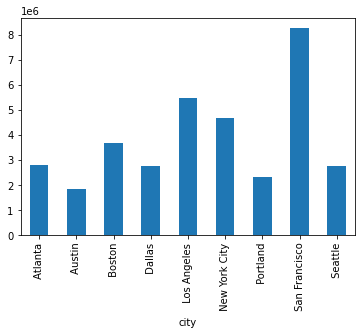

In [132]:
all_data.groupby('city')['total sales'].sum().plot(kind='bar')


### Q3 what time should we display advertisement to maximize likelyhood of customer's buying product?

In [137]:
#make a new column name time 
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Hour']=all_data['Order Date'].dt.hour
all_data['Minute']=all_data['Order Date'].dt.minute
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27
...,...,...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,20,56
11682,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,16,0
11683,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,7,39
11684,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,17,30


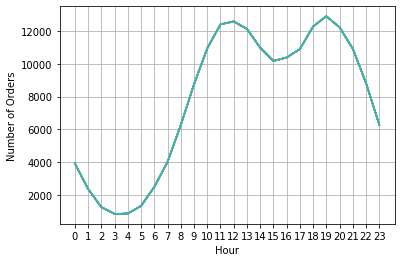

In [152]:
hours=[hour for hour,df in all_data.groupby('Hour')]
plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour')
plt.ylabel('Number of Orders') 
plt.show()
# advertisements should display  max at 11 am and 7pm 

In [149]:
#get highest sales hour in each city 
hour_data=all_data.groupby(['city','Hour']).count()

### Question 4 whaat products are most often sold togather?

In [210]:
# what products are most often sold together
df=all_data[all_data['Order ID'].duplicated(keep=False)] #With the keep parameter set to False, also the first occurence of a duplicate is set to True.
#for getting all duplicate order id
df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df=df[['Order ID','Grouped']].drop_duplicates()
df

C:\Users\diya\AppData\Local\Temp\ipykernel_15148\399855656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
11617,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
11619,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
11627,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
11639,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [211]:
from itertools import combinations
from collections import Counter
count=Counter()
for row in df ['Grouped']:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list,2)))
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### what product sold most?

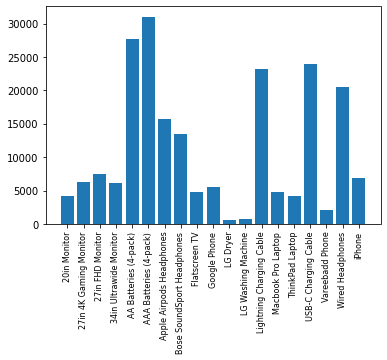

In [224]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

In [220]:
prices=all_data.groupby('Product')['Price Each'].mean()
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\diya\AppData\Local\Temp\ipykernel_15148\2469991730.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\diya\AppData\Local\Temp\ipykernel_15148\2469991730.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


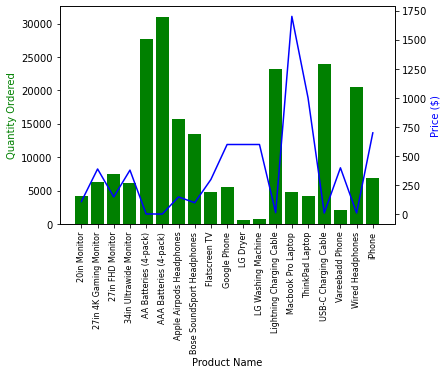

In [225]:
#adding second y axis
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

 